# **Chapter 7. Secular Perturbations**

## **Action by Daniel Niño-Villegas, University of Antioquia**

In this notebook we'll present part of the theoretical background of the chapter devoted to *Secular Perturbations* and some mathematical and numerical results which are interested for the theory.

For details on the theory please refer directly to the book:

> Murray, C. D., & Dermott, S. F. (1999). Solar system dynamics. Cambridge university press.

## Preliminaries

### Prerrequisites

In [1]:
#!pip install -q rebound
#!pip install -q tqdm

### Other libraries

In [2]:
#Global packages
import numpy as np
import matplotlib.pyplot as plt
import rebound as rb
from secular import *

#Specific modules and routines
from tqdm import tqdm
from scipy.signal import savgol_filter
from numpy.linalg import eig, solve

### Useful constants

In [3]:
deg = np.pi/180
rad = 1/deg
G = 39.476926   #AU^3 Msun^-1 yr^-2

### Plots aesthetics

In [4]:
%matplotlib nbagg
#If you run this in Colab use
#%matplotlib inline

plt.rcParams['text.usetex'] = True
#If you don't have installed latex
#font for matplotlib, set this parameter
#to false. If you run this in Colab, set
#this parameter to false.

## **Section 7.3 Jupiter and Saturn**

### Experiment: Jupiter and Saturn secular dynamics (7.3)

As we saw in the previous experiment, when we deal with a system made up with a central body and two comparable mass orbiting bodies we get the next disturbing function:

\begin{equation}
\begin{aligned}
& \mathcal{R}_j=n_j a_j^2\left[\frac{1}{2} A_{j j}\left(h_j^2+k_j^2\right)+A_{j k}\left(h_j h_k+k_j k_k\right)\right. \\
&\left.+\frac{1}{2} B_{j j}\left(p_j^2+q_j^2\right)+B_{j k}\left(p_j p_k+q_j q_k\right)\right]
\end{aligned} \tag{1}
\end{equation}

Where

\begin{equation*}
h_j=e_j \sin \varpi_j, \quad k_j=e_j \cos \varpi_j \tag{2}
\end{equation*}

\begin{equation*}
p_j=I_j \sin \Omega_j, \quad q_j=I_j \cos \Omega_j \tag{3}
\end{equation*}

are the eccentricity vectors. Remember that $j=1,2$, $k=2,1$ and $j \neq k$. Also $\bar{\alpha}_{12} = \alpha_{12}$ if $j=1$ and $\bar{\alpha}_{12} = 1$ if $j=2$. It can be shown (just like it's done in section 7.2 of the main text) that the components of this vectors satisfy the next set of differential equations:

\begin{equation*}
\begin{array}{ll}
\dot{h}_1=+A_{11} k_1+A_{12} k_2, & \dot{k}_1=-A_{11} h_1-A_{12} h_2 \\
\dot{h}_2=+A_{21} k_1+A_{22} k_2, & \dot{k}_2=-A_{21} h_1-A_{22} h_2 \\
\dot{p}_1=+B_{11} q_1+B_{12} q_2, & \dot{q}_1=-B_{11} p_1-B_{12} p_2 \\
\dot{p}_2=+B_{21} q_1+B_{22} q_2, & \dot{q}_2=-B_{21} p_1-B_{22} p_2
\end{array} \tag{4}
\end{equation*}

Or in vector notation:

\begin{equation*}
\begin{array}{ll}
\dot{\vec{h}} = \mathbf{A} \vec{k} & \dot{\vec{k}} = -\mathbf{A} \vec{h} \\
\dot{\vec{p}} = \mathbf{B} \vec{q} & \dot{\vec{q}} = -\mathbf{B} \vec{p}
\end{array} \tag{5}
\end{equation*}

This linear systems of differential equations can be solved as an eigenvalue problem, and yields:

\begin{equation*}
\begin{aligned}
h_j & =\sum_{i=1}^2 e_{j i} \sin \left(g_i t+\beta_i\right), & k_j & =\sum_{i=1}^2 e_{j i} \cos \left(g_i t+\beta_i\right) \\
p_j & =\sum_{i=1}^2 I_{j i} \sin \left(f_i t+\gamma_i\right), & q_j & =\sum_{i=1}^2 I_{j i} \cos \left(f_i t+\gamma_i\right)
\end{aligned} \tag{6} \label{eq:ex_vectors}
\end{equation*}

The frequencies $g_i$ and $f_i$ are the eigenvalues of the matrices $\mathbf{A}$ and $\mathbf{B}$, and $e_{ji}$, $I_{ji}$ are the components of their eigenvectors. The phases inside the sine and cosine arguments can be determined using th initial conditions. Expanding eqs. \eqref{eq:ex_vectors} yields:

\begin{equation*}
\begin{aligned}
h_j & =e_{j 1} \sin \left(g_1 t+\beta_1\right)+e_{j 2} \sin \left(g_2 t+\beta_2\right) \\
k_j & =e_{j 1} \cos \left(g_1 t+\beta_1\right)+e_{j 2} \cos \left(g_2 t+\beta_2\right) \\
p_j & =I_{j 1} \sin \left(f_1 t+\gamma_1\right)+I_{j 2} \sin \left(f_2 t+\gamma_2\right) \\
q_j & =I_{j 1} \cos \left(f_1 t+\gamma_1\right)+I_{j 2} \cos \left(f_2 t+\gamma_2\right)
\end{aligned} \tag{7}
\end{equation*}

With a little bit of algebraic effort it can be shown that the eccentricities and inclinations can be written as:

\begin{equation*}
e_1(t) = \left(e_{11}^2 + e_{12}^2 +2 e_{11} e_{12} \cos\left[(g_1 - g_2)t + (\beta_1 - \beta_2)\right]\right)^{1/2} \\
e_2(t) = \left(e_{21}^2 + e_{22}^2 +2 e_{21} e_{22} \cos\left[(g_1 - g_2)t + (\beta_1 - \beta_2)\right]\right)^{1/2} \\
I_1(t) = \left(I_{11}^2 + I_{12}^2 +2 I_{11} I_{12} \cos\left[(f_1 - f_2)t + (\gamma_1 - \gamma_2)\right]\right)^{1/2} \\
I_2(t) = \left(I_{21}^2 + I_{22}^2 +2 I_{21} I_{22} \cos\left[(f_1 - f_2)t + (\gamma_1 - \gamma_2)\right]\right)^{1/2} \tag{8} \label{eq:orb_el}
\end{equation*}

Now we can use this results to study the system made up with the Sun, Jupiter and Saturn in a secular approximation. First of all we'll run a simulation with Rebound using the initial conditions given in section 7.3 of the main text. Let's initialize the system:

In [5]:
#Jupiter - Particle #1
m1 = 9.54786e-4    #Msun
a1 = 5.202545      #AU
n1 = 30.3374*deg       #yr^-1
e1 = 0.0474622
pomega1 = 13.983865*deg
I1 = 1.30667*deg
Omega1 = 100.0381*deg

#Saturn - Particle #2
m2 = 2.85837e-4    #Msun
a2 = 9.554841      #AU
n2 = 12.1890*deg   #yr^-1
e2 = 0.0575481
pomega2 = 88.719425*deg
I2 = 2.48795*deg
Omega2 = 113.1334*deg

#Smulation t=0
sim = rb.Simulation()
sim.units = ('au', 'msun', 'yr')
sim.add(m=1, hash='Sun')
sim.add(m=m1, a=a1, e=e1, pomega=pomega1, inc=I1, Omega=Omega1, hash='Particle #1')
sim.add(m=m2, a=a2, e=e2, pomega=pomega2, inc=I2, Omega=Omega2, hash='Particle #2')
#sim.save('tmp/system.bin')

The initial state of the system can be visualized in the next way:

<IPython.core.display.Javascript object>


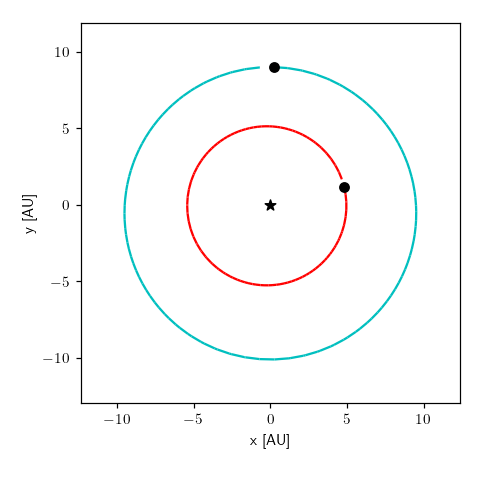

In [6]:
#Orbits plot
fig, ax = rb.OrbitPlot(sim, unitlabel='[AU]', orbit_type='solid', lw=1.5, color=True, figsize=(4,4))
fig.set_dpi(100)
fig.tight_layout()
plt.show()

Now we'll calculate the mean orbit periods who are very useful as a time step to simulate:

In [7]:
#Orbital periods
P1 = 2*np.pi/n1
P2 = 2*np.pi/n2

Now let's define the integration parameters in terms of the orbit period of the inner body, with an integration time of 100000 years:

In [8]:
#Integration parameters
sim.dt = P1/100
Nt = 10000
ts = np.linspace(0, 100000, Nt)

Finally let's do the integration refered to the central body reference system:

In [9]:
#Integration
Es = np.zeros((2,Nt,4))
for i,t in enumerate(tqdm(ts)):
    sim.integrate(t)
    sim.move_to_hel()
    orbits = sim.calculate_orbits()
    Es[0][i] = [orbits[0].e,
                orbits[0].inc,
                orbits[0].pomega,
                orbits[0].Omega]
    Es[1][i] = [orbits[1].e,
                orbits[1].inc,
                orbits[1].pomega,
                orbits[1].Omega]

100%|█████████████████████████████████████████████| 10000/10000 [00:04<00:00, 2471.18it/s]


With the simulation done, we can split the array with the results in individual arrays for the orbital elements of each particle. We'll apply a smoothing filter to all of the orbital elements to visualize the secular behaviour:

In [10]:
w = 301

#Particle #1
e1s = savgol_filter(Es[0,:,0], w, 2)
I1s = savgol_filter(Es[0,:,1], w, 2) 
pomega1s = savgol_filter(Es[0,:,2], w, 2)
Omega1s = savgol_filter(Es[0,:,3], w, 2)

#Particle #2
e2s = savgol_filter(Es[1,:,0], w, 2)
I2s = savgol_filter(Es[1,:,1], w, 2)
pomega2s = savgol_filter(Es[1,:,2], w, 2)
Omega2s = savgol_filter(Es[1,:,3], w, 2)

Before unveiling this results, we'll now focus on computing the orbital elements with the procedure described in the upper lines. We'll define the functions who perform every step and perform the calculations one by one. Let's begin with the matrices $\mathbf{A}$ and $\mathbf{B}$:

In [11]:
def A_matrix(n1, n2, m1, m2, alpha):
    A = np.zeros((2,2))
    
    A[0,0] = 0.25*n1*(m2/(1 + m1))*alpha**2*blap(alpha, 1.5, 1)
    A[0,1] = -0.25*n1*(m2/(1 + m1))*alpha**2*blap(alpha, 1.5, 2)
    A[1,0] = -0.25*n2*(m1/(1 + m2))*alpha*blap(alpha, 1.5, 2)
    A[1,1] = 0.25*n2*(m1/(1 + m2))*alpha*blap(alpha, 1.5, 1)
    
    return A

def B_matrix(n1, n2, m1, m2, alpha):
    B = np.zeros((2,2))
    
    B[0,0] = -0.25*n1*(m2/(1 + m1))*alpha**2*blap(alpha, 1.5, 1)
    B[0,1] = 0.25*n1*(m2/(1 + m1))*alpha**2*blap(alpha, 1.5, 1)
    B[1,0] = 0.25*n2*(m1/(1 + m2))*alpha*blap(alpha, 1.5, 1)
    B[1,1] = -0.25*n2*(m1/(1 + m2))*alpha*blap(alpha, 1.5, 1)
    
    return B

These matrices involve the computing of the Laplace coefficients, who is performed using the functions defined in previous notebooks. All quantities who involve angles will be computed in radians but shown in degrees.

In [12]:
A = A_matrix(n1, n2, m1, m2, a1/a2)
B = B_matrix(n1, n2, m1, m2, a1/a2)

print('A =',A*rad)
print('\nB =', B*rad)

A = [[ 0.00203738 -0.00132987]
 [-0.00328007  0.00502513]]

B = [[-0.00203738  0.00203738]
 [ 0.00502513 -0.00502513]]


Now let's use the `eig()` function from the Numpy library to compute the eigenvalues and eigenvectors from $\mathbf{A}$ and $\mathbf{B}$ 

In [13]:
gs, eij_ = eig(A)
fs, Iij_ = eig(B)

print('g1 = %.10f °/yr'%(gs[0]*rad))
print('g2 = %.10f °/yr'%(gs[1]*rad))

print('\nej1_ =', eij_[:,0])
print('ej2_ =', eij_[:,1])

print('\nIj1_ =', Iij_[:,0])
print('Ij2_ =', Iij_[:,1])

g1 = 0.0009634346 °/yr
g2 = 0.0060990804 °/yr

ej1_ = [-0.77799125 -0.62827511]
ej2_ = [ 0.31116203 -0.95035688]

Ij1_ = [0.70710678 0.70710678]
Ij2_ = [-0.37573125  0.92672867]


The diagonalization process yields the normalized eigenvectors of $\mathbf{A}$ and $\mathbf{B}$ ($\bar{e_{ji}}$ and $\bar{I_{ji}}$), but the physical ones are scaled up a constant:

$$e_{ji} = S_i \bar{e_{ji}}, \hspace{1 cm} I_{ji} = T_i \bar{I_{ji}}$$

So, in $t = 0$ we get:

\begin{equation*}
h_j = S_1 \bar{e}_{j 1} \sin \beta_1 + S_2 \bar{e}_{j 2} \sin \beta_2 \tag{9} \label{eq:eq1}
\end{equation*}
\begin{equation*}
k_j = S_1 \bar{e}_{j 1} \cos \beta_1 + S_2 \bar{e}_{j 2} \cos \beta_2 \tag{10} \label{eq:eq2}
\end{equation*}
\begin{equation*}
p_j = T_1 \bar{I}_{j 1} \sin \gamma_1 + T_2 \bar{I}_{j 2} \sin \gamma_2 \tag{11} \label{eq:eq3}
\end{equation*}
\begin{equation*}
q_j = T_1 \bar{I}_{j 1} \cos \gamma_1 + T_2 \bar{I}_{j 2} \cos \gamma_2  \tag{12} \label{eq:eq4}
\end{equation*}

This yields:

* Eq. \eqref{eq:eq_1} define a linear equation system for $S_1 \sin \beta_1$ and $S_2 \sin \beta_2$.
* Eq. \eqref{eq:eq_2} define a linear equation system for $S_1 \cos \beta_1$ and $S_2 \cos \beta_2$.
* Eq. \eqref{eq:eq_3} define a linear equation system for $T_1 \sin \gamma_1$ and $T_2 \sin \gamma_2$.
* Eq. \eqref{eq:eq_4} define a linear equation system for $T_1 \sin \gamma_1$ and $T_2 \sin \gamma_2$.

Now let's define a pair of functions who given $h_j(0), k_j(0), p_j(0), q_j(0)$ and the normalized eigenvectors computes the values $S_i, T_i, \beta_i$ and $\gamma_i$: 

In [14]:
def diag_eij(A, hj_0, kj_0):
    Ss = np.zeros(2)
    bs = np.zeros(2)
    
    #Compute the eigenvalues and eigenvectors
    gs, eij_ = eig(A)
    
    #Solve the linear equation systems
    xs = solve(eij_, hj_0)
    ys = solve(eij_, kj_0)
    
    #Compute S_i and beta_i
    Ss = np.sqrt(xs**2 + ys**2)
    bs = np.arctan2(xs, ys)
    
    return Ss, bs

def diag_Iij(B, pj_0, qj_0):
    Ts = np.zeros(2)
    ls = np.zeros(2)
    
    #Compute the eigenvalues and eigenvectors
    fs, Iij_ = eig(B)
    
    #Solve the linear equation systems
    xs = solve(Iij_, pj_0)
    ys = solve(Iij_, qj_0)
    
    #Compute T_i and gamma_i
    Ts = np.sqrt(xs**2 + ys**2)
    ls = np.arctan2(xs, ys)
    
    return Ts, ls

Let's find these values:

In [15]:
hj_0 = np.array([e1*np.sin(pomega1), e2*np.sin(pomega2)])
kj_0 = np.array([e1*np.cos(pomega1), e2*np.cos(pomega2)])

pj_0 = np.array([I1*np.sin(Omega1), I2*np.sin(Omega2)])
qj_0 = np.array([I1*np.cos(Omega1), I2*np.cos(Omega2)])

Ss, bs = diag_eij(A, hj_0, kj_0)
Ts, ls = diag_Iij(B, pj_0, qj_0)

print('S1 = %.7f'%Ss[0])
print('S2 = %.7f'%Ss[1])
print('beta1 = %.3f°'%(bs[0]*rad))
print('beta2 = %.4f°'%(bs[1]*rad))

print('\nT1 = %.7f'%Ts[0])
print('T2 = %.7f'%Ts[1])
print('gamma1 = %.3f°'%(ls[0]*rad))
print('gamma2 = %.3f°'%(ls[1]*rad))

S1 = 0.0564044
S2 = 0.0500664
beta1 = -146.892°
beta2 = -53.3565°

T1 = 0.0404025
T2 = 0.0167611
gamma1 = 105.740°
gamma2 = 126.825°


With these values we can write the functions who construct the physical eigenvectors $e_{ji}$ and $I_{ji}$:

In [16]:
def eij_func(A, hj_0, kj_0):
    eij = np.zeros((2,2))
    
    #Compute the normalized eigenvectors
    gs, eij_ = eig(A)
    
    #Compute the scale factors
    Ss, bs = diag_eij(A, hj_0, kj_0)
    
    #Scale the eigenvectors
    eij[:,0] = Ss[0]*eij_[:,0]
    eij[:,1] = Ss[1]*eij_[:,1]
    
    return eij

def Iij_func(B, pj_0, qj_0):
    Iij = np.zeros((2,2))
    
    #Compute the normalized eigenvectors
    fs, Iij_ = eig(B)
    
    #Compute the scale factors
    Ts, ls = diag_Iij(B, pj_0, qj_0)
    
    #Scale the eigenvectors
    Iij[:,0] = Ts[0]*Iij_[:,0]
    Iij[:,1] = Ts[1]*Iij_[:,1]
    
    return Iij

Now let's compute $e_{ji}$ and $I_{ji}$:

In [17]:
eij = eij_func(A, hj_0, kj_0)
Iij = Iij_func(B, pj_0, qj_0)

print('\nej1 =', eij[:,0])
print('ej2 =', eij[:,1])

print('\nIj1 =', Iij[:,0])
print('Ij2 =', Iij[:,1])


ej1 = [-0.04388212 -0.03543747]
ej2 = [ 0.01557877 -0.04758096]

Ij1 = [0.02856888 0.02856888]
Ij2 = [-0.00629766  0.01553296]


Finally, we can use this results combined with Eqs. \eqref{eq:orb_el} to define the functions who compute the orbital elements $e, \varpi, I$ and $\Omega$ as a function of time:

In [18]:
def e_func(t, j):
    return np.sqrt( eij[j,0]**2 + eij[j,1]**2 +2*eij[j,0]*eij[j,1]*np.cos((gs[0] - gs[1])*t + (bs[0]-bs[1])) )

def I_func(t, j):
    return np.sqrt( Iij[j,0]**2 + Iij[j,1]**2 +2*Iij[j,0]*Iij[j,1]*np.cos((fs[0] - fs[1])*t + (ls[0]-ls[1])))

def pomega_func(t, j):
    x = eij[j,0]*np.cos(gs[0]*t + bs[0]) + eij[j,1]*np.cos(gs[1]*t + bs[1])
    y = eij[j,0]*np.sin(gs[0]*t + bs[0]) + eij[j,1]*np.sin(gs[1]*t + bs[1])
    
    return np.arctan2(y, x)

def Omega_func(t, j):
    x = Iij[j,0]*np.cos(fs[0]*t + ls[0]) + Iij[j,1]*np.cos(fs[1]*t + ls[1])
    y = Iij[j,0]*np.sin(fs[0]*t + ls[0]) + Iij[j,1]*np.sin(fs[1]*t + ls[1])
    
    return np.arctan2(y, x)

Let's plot the simulation results with the theoretical prediction:

<IPython.core.display.Javascript object>


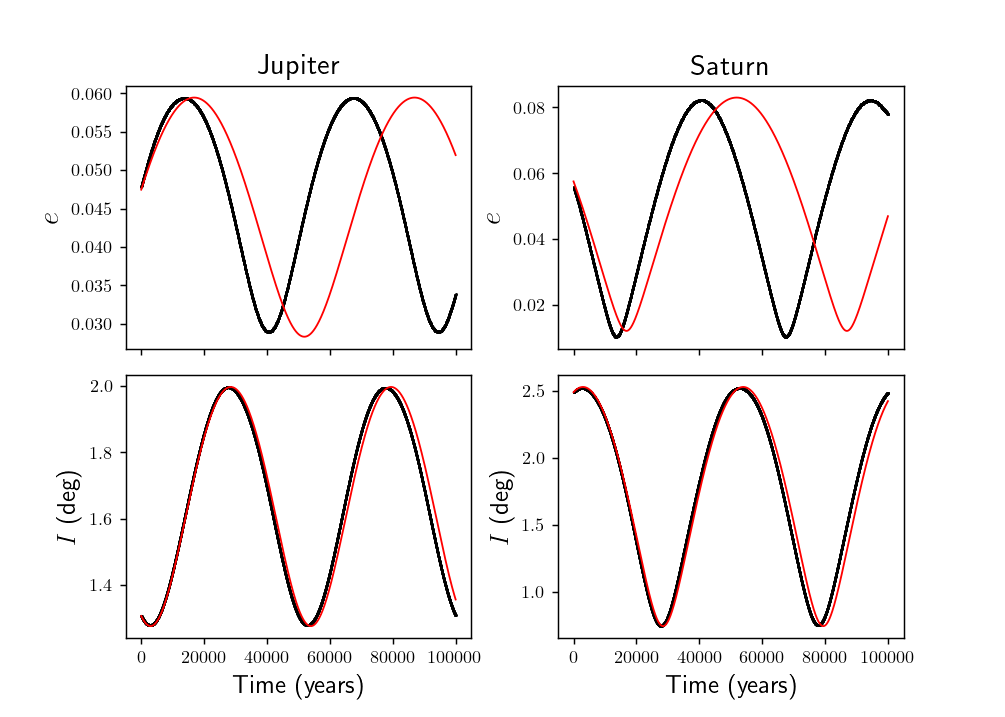

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(7,5), sharex=True, dpi=120)
axs[0,0].set_title('Jupiter', fontsize=16)
axs[0,0].set_ylabel(r'$e$', fontsize=16)
axs[0,0].plot(ts, e1s, 'k.', ms=.5)
axs[0,0].plot(ts, e_func(ts,0), 'r-', lw=1)

axs[0,1].set_title('Saturn', fontsize=16)
axs[0,1].set_ylabel(r'$e$', fontsize=16)
axs[0,1].plot(ts, e2s, 'k.', ms=0.5)
axs[0,1].plot(ts, e_func(ts,1), 'r-', lw=1)

axs[1,0].set_xlabel('Time (years)', fontsize=14)
axs[1,0].set_ylabel(r'$I$ (deg)', fontsize=14)
axs[1,0].plot(ts, I1s*rad, 'k.', ms=.5)
axs[1,0].plot(ts, I_func(ts, 0)*rad, 'r-', lw=1)

axs[1,1].set_xlabel('Time (years)', fontsize=14)
axs[1,1].set_ylabel(r'$I$ (deg)', fontsize=14)
axs[1,1].plot(ts, I2s*rad, 'k.', ms=.5)
axs[1,1].plot(ts, I_func(ts, 1)*rad, 'r-', lw=1)

plt.subplots_adjust(hspace=0.1, wspace=0.25)
plt.show()

<IPython.core.display.Javascript object>


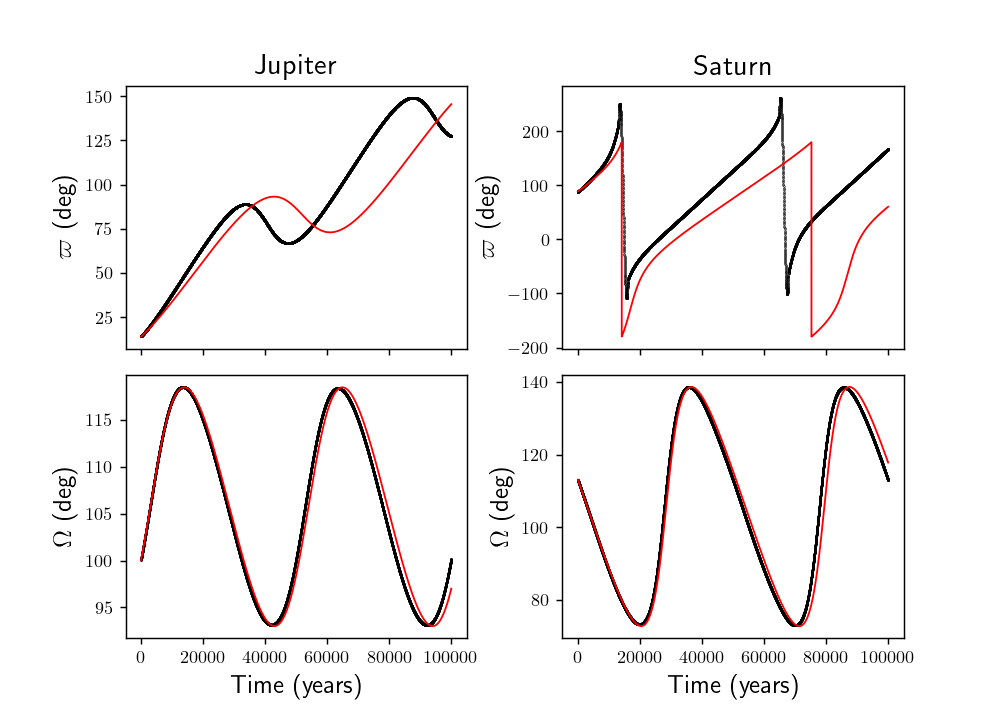

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(7,5), sharex=True, dpi=120)
axs[0,0].set_title('Jupiter', fontsize=16)
axs[0,0].set_ylabel(r'$\varpi$ (deg)', fontsize=14)
axs[0,0].plot(ts, pomega1s*rad, 'k.', ms=.5)
axs[0,0].plot(ts, pomega_func(ts, 0)*rad, 'r-', lw=1)

axs[0,1].set_title('Saturn', fontsize=16)
axs[0,1].set_ylabel(r'$\varpi$ (deg)', fontsize=14)
axs[0,1].plot(ts, pomega2s*rad, 'k.', ms=0.5)
axs[0,1].plot(ts, pomega_func(ts, 1)*rad, 'r-', lw=1)

axs[1,0].set_xlabel('Time (years)', fontsize=14)
axs[1,0].set_ylabel(r'$\Omega$ (deg)', fontsize=14)
axs[1,0].plot(ts, Omega1s*rad, 'k.', ms=.5)
axs[1,0].plot(ts, Omega_func(ts, 0)*rad, 'r-', lw=1)

axs[1,1].set_xlabel('Time (years)', fontsize=14)
axs[1,1].set_ylabel(r'$\Omega$ (deg)', fontsize=14)
axs[1,1].plot(ts, Omega2s*rad, 'k.', ms=.5)
axs[1,1].plot(ts, Omega_func(ts, 1)*rad, 'r-', lw=1)

plt.subplots_adjust(hspace=0.1, wspace=0.28)
plt.show()

As we can see in the previous plots, the theoretical prediction for $e$ and $\varpi$ doesn't fit quite well, but it surely describes the general behaviour over time. On the other hand, the theoretical prediction for $I$ and $\Omega$ fits with a high precision, just with a little gap as time increases. This results endorse the power of this theory in the description of the orbital elements in a secular regime, but they can't darken all the approximations who were done for reaching this point.